In [2]:
import torch
import matplotlib.pyplot as plt

from PIL import Image
from transformers import CLIPSegProcessor, CLIPSegForImageSegmentation

device = "cuda" if torch.cuda.is_available() else "cpu"

processor = CLIPSegProcessor.from_pretrained("CIDAS/clipseg-rd64-refined")
model = CLIPSegForImageSegmentation.from_pretrained("CIDAS/clipseg-rd64-refined").to(device)

preprocessor_config.json:   0%|          | 0.00/380 [00:00<?, ?B/s]

c:\Users\17346\anaconda3\envs\env1\lib\site-packages\huggingface_hub\file_download.py:157: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\17346\.cache\huggingface\hub\models--CIDAS--clipseg-rd64-refined. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/974 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.73k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/603M [00:00<?, ?B/s]

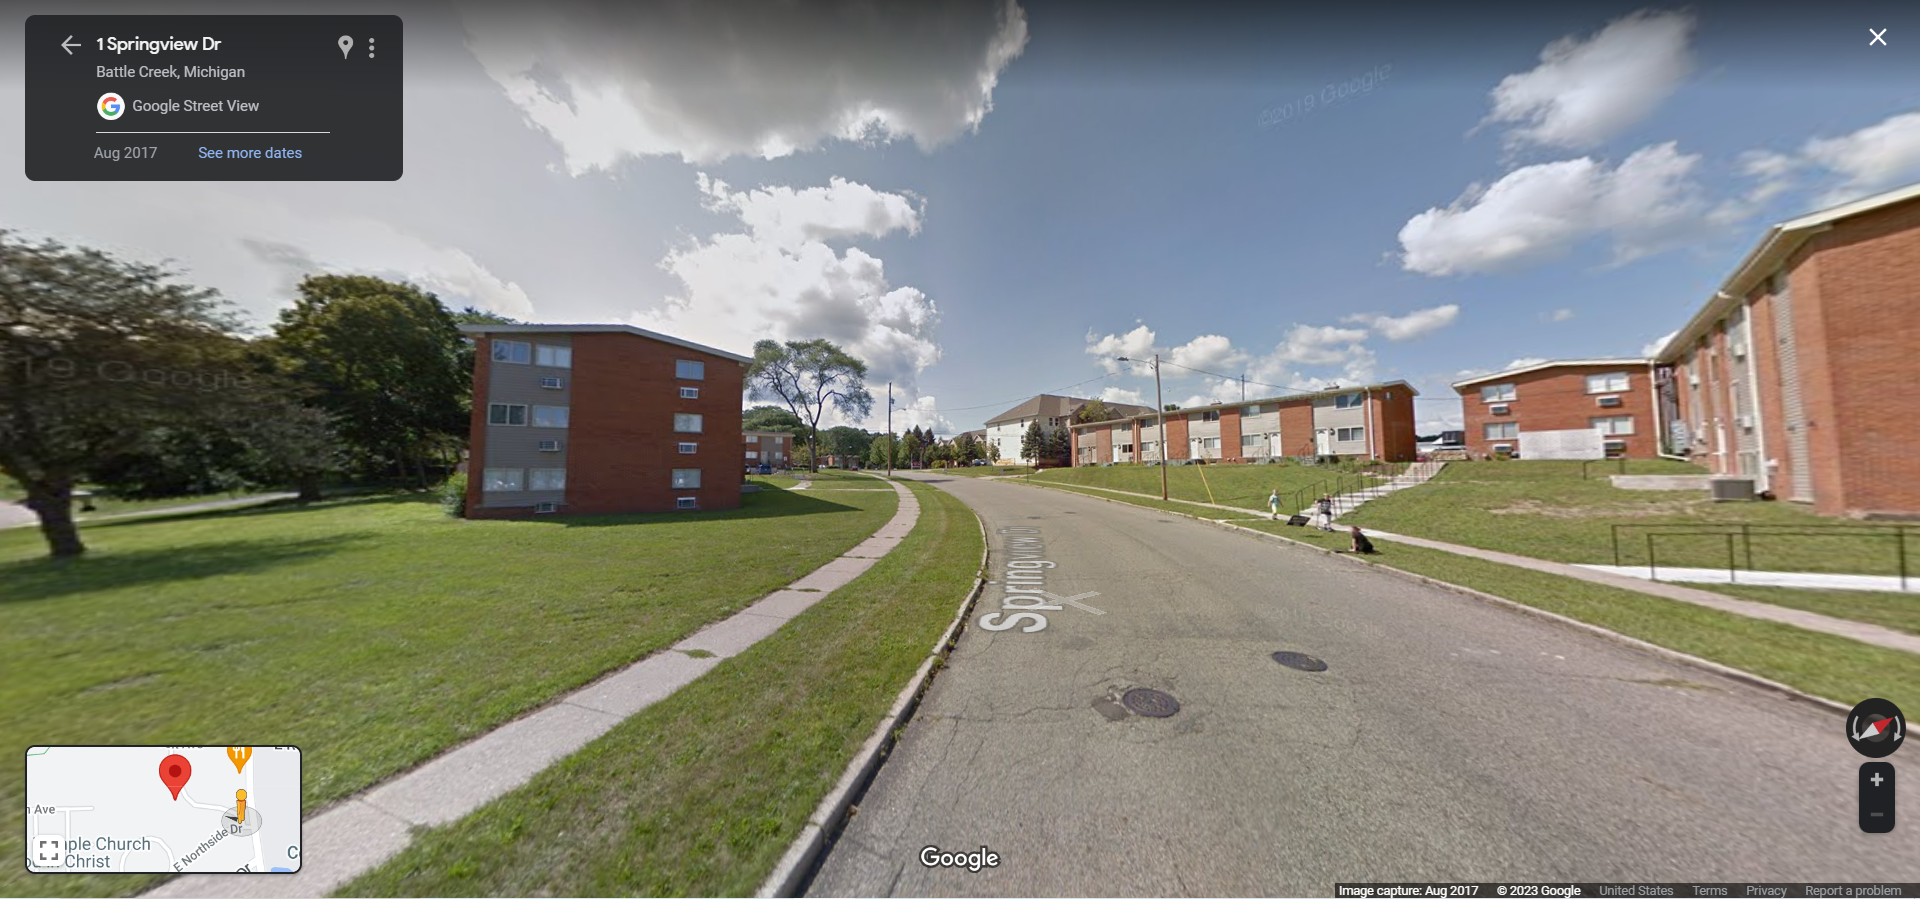

In [22]:
# img_path = "./data/117_TEALR_streetview_NE.png"
img_path = "./data/113_SHELB_streetview_SE.png"

image = Image.open(img_path).convert("RGB")
image

In [27]:
image.size

(1920, 899)

In [19]:
prompts = ["a sidewalk", "narrow sidewalk", "pavement", "curve cut"]

inputs = processor(text=prompts, images=[image] * len(prompts), padding="max_length", return_tensors="pt").to(device)

Unused or unrecognized kwargs: padding.


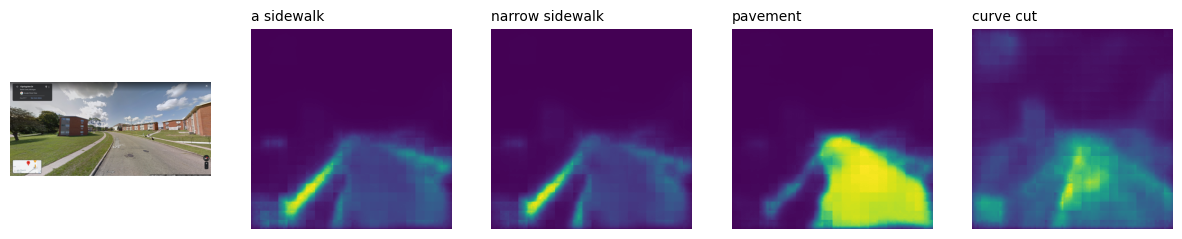

In [20]:
with torch.no_grad():
  outputs = model(**inputs)

preds = outputs.logits.unsqueeze(1)

# visualize prediction
_, ax = plt.subplots(1, 5, figsize=(15, 4))
[a.axis('off') for a in ax.flatten()]
ax[0].imshow(image)
[ax[i+1].imshow(torch.sigmoid(preds[i][0].detach().cpu())) for i in range(4)];
[ax[i+1].text(0, -15, prompts[i]) for i in range(4)];
     